##### Importing needed Packages 

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Transactions sheet and explore it  

In [61]:
transactions_df = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\project_transactions.csv', 
                              delimiter=',')


transactions_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [62]:
'''Checking missing data'''
transactions_df.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [63]:
'''Modify datatypes for all columns'''
transactions_df.dtypes

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object

In [64]:
transactions_df.info(memory_usage='deep')  #usage: 180.1MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [65]:
transactions_df.describe().round(2) 

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11,3267.94,-0.53,56.33,-0.02,-0.00
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19,9122.39,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [66]:
'''
1. Discounts has small values and can be replaced with float32
2. WEEK_NO has small values int32
'''


#way1
transactions_df = transactions_df.astype(
    {
    'RETAIL_DISC': 'float32', 
    'COUPON_DISC': 'float32', 
    'COUPON_MATCH_DISC': 'float32', 
    'WEEK_NO': 'int32'
    }
    
)


transactions_df.info(memory_usage='deep')

#or 

# transactions_df = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\project_transactions.csv', 
#                               delimiter=',', 
#                               dtype= {'RETAIL_DISC': 'float32', 
#                                     'COUPON_DISC': 'float32', 
#                                     'COUPON_MATCH_DISC': 'float32', 
#                                     'WEEK_NO': 'int32'
#                                      }
#                             )


# transactions_df.info(memory_usage='deep')  #memory usage: 147.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float32
 8   WEEK_NO            int32  
 9   COUPON_DISC        float32
 10  COUPON_MATCH_DISC  float32
dtypes: float32(3), float64(1), int32(1), int64(6)
memory usage: 147.4 MB


##### Check count of our dimensions in transaction model

In [67]:
'''unique values for products IDs dimension in transactional model'''

print(transactions_df['PRODUCT_ID'].count())
transactions_df['PRODUCT_ID'].nunique()

2146311


84138

In [68]:
'''unique values for household dimension in transactional tmodel'''
print(transactions_df['household_key'].count())
transactions_df['household_key'].nunique()

2146311


2099

In [69]:
'''explore the discount calculation'''
transactions_df[['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC']].query("COUPON_DISC != 0 and COUPON_MATCH_DISC != 0 ")

,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
123,-0.69,-0.40,-0.40
143,-0.90,-0.75,-0.25
199,-0.49,-0.55,-0.45
509,-1.87,-2.25,-0.75
584,-0.89,-0.55,-0.45
...,...,...,...
2146008,0.00,-0.50,-0.50
2146016,-0.30,-0.35,-0.35
2146026,0.00,-0.40,-0.40
2146031,0.00,-0.70,-0.30


## Create new calculated columns based on Business

##### 
1. total_discount  = RETAIL_DISC +  COUPON_DISC 
2. discount %  =  abs(total_discount / sales_value)  ---> As total_discount increase, discount_percentage increase (selling product will be highly less than actual product price)
3. drop main discounts columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC)

In [70]:
transactions_df = transactions_df.assign(
    total_discount = transactions_df['RETAIL_DISC'] + transactions_df['COUPON_DISC'], 
    discount_percent = lambda var: (var['total_discount'] / var['SALES_VALUE']).round(2).abs()
).drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1).reindex(['household_key', 'BASKET_ID', 'DAY', 'WEEK_NO', 'PRODUCT_ID', 'STORE_ID', 'QUANTITY', 'SALES_VALUE', 'total_discount', 'discount_percent'], axis=1)
# .query("total_discount != 0")

In [71]:
transactions_df["discount_percent"] = (transactions_df["discount_percent"]
                                       .where(transactions_df["discount_percent"] < 1, 1.0)
                                       .where(transactions_df["discount_percent"] > 0, 0)
                                      )

transactions_df.head()

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
0,1364,26984896261,1,1,842930,31742,1,2.19,0.00,0.00
1,1364,26984896261,1,1,897044,31742,1,2.99,-0.40,0.13
2,1364,26984896261,1,1,920955,31742,1,3.09,0.00,0.00
3,1364,26984896261,1,1,937406,31742,1,2.50,-0.99,0.40
4,1364,26984896261,1,1,981760,31742,1,0.60,-0.79,1.00


## Overall Statistics (Measures)

#####
1. total_sales = sum(`SALES_VALUE`)
2. total_discount = sum(`total_discount`)
3. overall_discount_percent = sum(`total_discount`) / sum(`SALES_VALUE`)
4. quantity_sold = sum(`QUANTITY`)
5. Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
6. Total_sales_basket_id =  sum(`SALES_VALUE`) / nunique `basket_id`.
7. Total_sales_household_id = sum(`SALES_VALUE`) / nunique `household_key`. 
8. What was the highest quantiy sold for a single item in a single row?


In [72]:
'''total_sales = sum(`SALES_VALUE`)'''
total_sales = transactions_df['SALES_VALUE'].sum().round(2)
total_sales

6666243.5

In [73]:
'''total_discount = sum(`total_discount`)'''
total_discount = transactions_df['total_discount'].sum()
total_discount

-1178658.0

In [74]:
'''overall_discount_percent = sum(total_discount) / sum(SALES_VALUE)'''
overall_discount_percent = (transactions_df['total_discount'].sum() / transactions_df['SALES_VALUE'].sum()).round(2)
overall_discount_percent

-0.18

In [75]:
transactions_df['discount_percent'].mean()

0.2074489531107095

### Conclusion 
* `Discount_percent` is 17.7%.

Now, if we take the average of our percentage discount column, we'll get a slightly different value, which is 21% on a row by row basis.

* Our `average_discount_percent` is 21%.

So this indicates that we're giving discounts on items that represent a smaller portion of our revenue, which is why the line level percentage discount is higher than our overall discount percentage.
`(average > total)`
But overall, our discount rate is about 17.6%, which is quite in line with maven Smart's own discount percentage.

We probably can't increase discounts at our acquisition target to drive more sales, but at the very least, we know they have a comparable strategy to our own, which gives us some confidence in their management, in their own strategic thinking.


#############################################################################################################################################################################

In [76]:
'''quantity_sold = sum(`QUANTITY`)'''
quantity_sold = transactions_df['QUANTITY'].sum()
quantity_sold

216713611

In [77]:
'''Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?'''
transactions_df.sort_values('QUANTITY', ascending=False)[:1]

#or 
transactions_df.iloc[[transactions_df['QUANTITY'].argmax()]]

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
1442095,630,34749153595,503,73,6534178,384,89638,250.0,-13.45,0.05


In [78]:
'''Total_sales_basket_id =  sum(SALES_VALUE) / nunique basket_id.'''
total_sales_basket_ids = (transactions_df['SALES_VALUE'].sum() / transactions_df['BASKET_ID'].nunique()).round(2)
total_sales_basket_ids

28.62

In [79]:
'''Total_sales_household_id = sum(SALES_VALUE) / nunique household_key.'''
total_sales_household_ids = (transactions_df['SALES_VALUE'].sum() / transactions_df['household_key'].nunique()).round(2)
total_sales_household_ids

3175.91

In [80]:
'''What was the highest quantiy sold for a single item in a single row?'''
transactions_df.groupby('PRODUCT_ID')[['QUANTITY']].sum().sort_values('QUANTITY', ascending=False)[:1]

,QUANTITY
PRODUCT_ID,
6534178,180705254


### Analyzing total sales and quantities per household

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

In [81]:
transactions_df.head()

,household_key,BASKET_ID,DAY,WEEK_NO,PRODUCT_ID,STORE_ID,QUANTITY,SALES_VALUE,total_discount,discount_percent
0,1364,26984896261,1,1,842930,31742,1,2.19,0.00,0.00
1,1364,26984896261,1,1,897044,31742,1,2.99,-0.40,0.13
2,1364,26984896261,1,1,920955,31742,1,3.09,0.00,0.00
3,1364,26984896261,1,1,937406,31742,1,2.50,-0.99,0.40
4,1364,26984896261,1,1,981760,31742,1,0.60,-0.79,1.00


<Axes: ylabel='Frequency'>

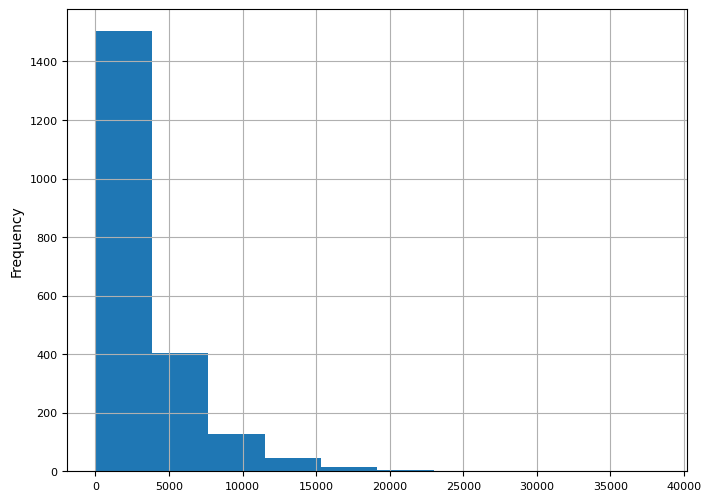

In [82]:
# transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).plot.hist()

transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).plot(kind='hist', 
                                                                          figsize= (8, 6), 
                                                                          legend=False, 
                                                                          fontsize= 8, 
                                                                          grid=True)

In [83]:
top10_by_sales = transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[:10]
top10_by_sales
top10__by_quantity = transactions_df.groupby('household_key').agg({'QUANTITY': 'sum'}).sort_values('QUANTITY', ascending=False)[:10]
top10__by_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [84]:
transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum', 'QUANTITY': 'sum'}).sort_values(['SALES_VALUE', 'QUANTITY'], ascending=[False, False])[:10]
transactions_df.groupby('household_key').agg({'QUANTITY': 'sum', 'SALES_VALUE': 'sum'}).sort_values(['QUANTITY', 'SALES_VALUE'], ascending=[False, False])[:10]

,QUANTITY,SALES_VALUE
household_key,,
1023,4479917,38319.79
755,3141769,10617.05
1609,2146715,27859.68
13,1863829,13190.92
1430,1741892,20352.99
1527,1734632,17295.18
1762,1669880,15360.14
707,1640193,19194.42
1029,1496204,13785.55


<Axes: title={'center': 'Top 10 Household sales'}, xlabel='household_key', ylabel='Total Sales'>

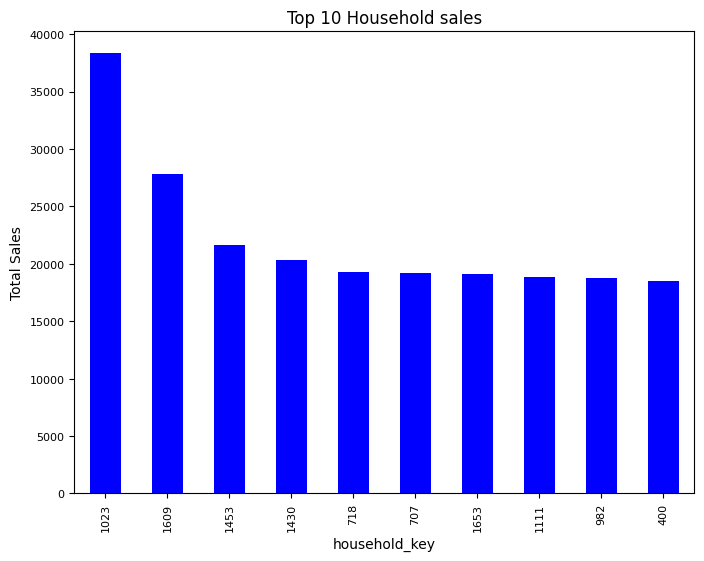

In [85]:
top10_by_sales.plot(kind='bar', 
                        legend=False, 
                        figsize= (8,6), 
                        fontsize=8, 
                        ylabel="Total Sales", 
                        title="Top 10 Household sales", 
                        color = "blue")

### Analyzing product sales 

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

<Figure size 640x480 with 0 Axes>

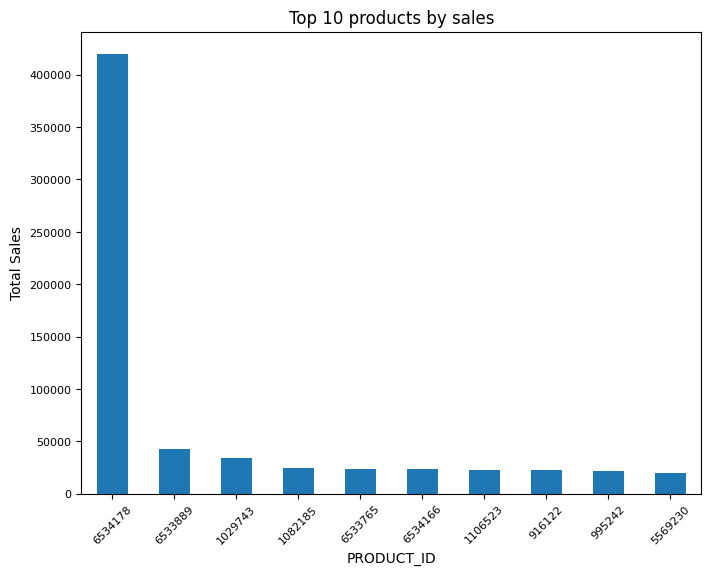

<Figure size 640x480 with 0 Axes>

In [86]:
'''Ploting products which had the most sales_values'''

transactions_df.groupby('PRODUCT_ID').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[: 10].plot(kind='bar', 
                                                                                                                         figsize= (8,6), 
                                                                                                                         legend=False, 
                                                                                                                         fontsize= 8, 
                                                                                                                         ylabel= "Total Sales", 
                                                                                                                         title= "Top 10 products by sales")

plt.xticks(rotation=45)
plt.figure()

In [87]:
'''Checking if top 10 products has discount rate > average discount rate'''

top_10_products = transactions_df.groupby('PRODUCT_ID').agg({'SALES_VALUE': 'sum'}).sort_values('SALES_VALUE', ascending=False)[: 10]





# average_discount_rate = sum(total discount for 10 products)/ sum(total sales for 10 products)

average_discount_rate_top10 = (transactions_df.query("PRODUCT_ID in @top_10_products.index")
                         .agg({'total_discount':'sum'}).iloc[0]) / (
                        transactions_df.query("PRODUCT_ID in @top_10_products.index")
                         .agg({'SALES_VALUE':'sum'}).iloc[0])
print(average_discount_rate_top10)






main_columns = transactions_df.query("PRODUCT_ID in @top_10_products.index").groupby('PRODUCT_ID')[['SALES_VALUE', 'total_discount']].sum()
main_columns

main_columns.assign(
    discount_rate = main_columns['total_discount'].abs() / main_columns['SALES_VALUE'],
    diff_discountRate_AvgRate = lambda x:x['discount_rate'] - abs(average_discount_rate_top10),   # res>0 --> higher than average discount rate
    exceed_average_discount_rate = lambda y: np.where(y['diff_discountRate_AvgRate']> 0, "Yes", "No")
)

-0.10331266528732726


,SALES_VALUE,total_discount,discount_rate,diff_discountRate_AvgRate,exceed_average_discount_rate
PRODUCT_ID,,,,,
916122,22749.02,-23687.810547,1.041267,0.937955,Yes
995242,21229.72,-11363.709961,0.535274,0.431961,Yes
1029743,33894.75,-2175.060059,0.064171,-0.039142,No
1082185,24149.79,-1869.560059,0.077415,-0.025897,No
1106523,22931.01,-1427.760010,0.062263,-0.041049,No
5569230,20051.95,-10687.540039,0.532993,0.429680,Yes
6533765,23831.14,0.000000,0.000000,-0.103313,No
6533889,42339.31,-1445.680054,0.034145,-0.069168,No
6534166,23755.70,-787.440002,0.033147,-0.070165,No


### Conclusion
We can see that for our top ten products, our overall discount rate was around 10%, which is significantly lower than the 17% overall discount rate we saw for our general data set.

So another strong pricing strategy by our acquisition target here, they know that folks are coming to our store to buy these products.
* Why would we need to discount them if this is what they're coming to buy every week?
* What we need to discount are items that we're not sure the customer is going to buy without an extra incentive.

So by discounting our staple items less, that gives us more room to discount the items that might get folks to come in the door or sell products it might be starting to spoil or other things.

##########################################################################################################################################################

In [88]:
'''What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?'''
top_10_householdIDs = transactions_df.groupby(['household_key']).agg({'SALES_VALUE': 'sum'}).sort_values(['SALES_VALUE'], ascending=[False])[:10]
top_10_householdIDs


most_common_productIDs = transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'PRODUCT_ID'].unique()
print(f'ProductIds are {most_common_productIDs}')
most_common_productIDs_count =transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'PRODUCT_ID'].nunique()
print(f'count of productIds {most_common_productIDs_count}')



transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'household_key'].unique()
transactions_df.query("household_key in @top_10_householdIDs.index").loc[:, 'household_key'].nunique()

ProductIds are [  830503   839605   840664 ...   925230  1093799 17937077]
count of productIds 13878


10

In [89]:
products = pd.read_csv(r'E:\Course Data Analysis with python (Maven Analytics)\Pandas+Course+Resources\Pandas Course Resources\project_data\product.csv', 
                       delimiter=',')

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [90]:
'''Look up the names of the  top 10 products by sales in the `products.csv` dataset'''
top10_by_sales


lookup_top10_products = transactions_df.query("household_key in @top10_by_sales.index").loc[:, "PRODUCT_ID"].value_counts().sort_values(ascending=False)[:10]
lookup_top10_products


products.query("PRODUCT_ID in @lookup_top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [91]:
'''Look up the product name of the item that had the highest quantity sold in a single row.'''

top10__by_quantity


lookup2_top10_products = transactions_df.query("household_key in @top10__by_quantity.index").loc[:, "PRODUCT_ID"].value_counts().sort_values(ascending=False)[:10].index
lookup2_top10_products

products.query("PRODUCT_ID == @lookup2_top10_products[0]")


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

In [92]:
'''Re-load transactions sheet with few modifications'''
transactions_df = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\project_transactions.csv', 
                                delimiter=',', 
                                usecols= ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE'])


transactions_df.head()


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [93]:
'''check memory usage '''
transactions_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int64  
 3   PRODUCT_ID     int64  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
dtypes: float64(1), int64(5)
memory usage: 98.3 MB


In [94]:
'''checking if datatypes can be changed to enhance memory usage'''
print(transactions_df.dtypes)
transactions_df.describe().round(2)

household_key      int64
BASKET_ID          int64
DAY                int64
PRODUCT_ID         int64
QUANTITY           int64
SALES_VALUE      float64
dtype: object


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00


In [95]:
transactions_df = transactions_df.astype({
    'DAY': 'int16',
    'PRODUCT_ID': 'int32',
    'QUANTITY': 'int32',
    'SALES_VALUE': 'float16'
})


transactions_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int32  
 5   SALES_VALUE    float16
dtypes: float16(1), int16(1), int32(2), int64(2)
memory usage: 57.3 MB


In [96]:
'''create date column'''
transactions_df.head()

transactions_df = transactions_df.assign(
    date = pd.to_datetime("2022", format='%Y') + pd.to_timedelta(transactions_df['DAY'].sub(1).astype(str) + "days")
).drop('DAY', axis=1).reindex(['date', 'household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE'], axis=1)



In [98]:
transactions_df.head()

,date,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
0,2022-01-01,1364,26984896261,842930,1,2.189453
1,2022-01-01,1364,26984896261,897044,1,2.990234
2,2022-01-01,1364,26984896261,920955,1,3.089844
3,2022-01-01,1364,26984896261,937406,1,2.500000
4,2022-01-01,1364,26984896261,981760,1,0.600098


###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

# Time Based Analysis 

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2022 and October 2023.
* Then, plot the sum of monthly sales in 2022 vs the monthly sales 2023.
* Finally, plot total sales by day of week.

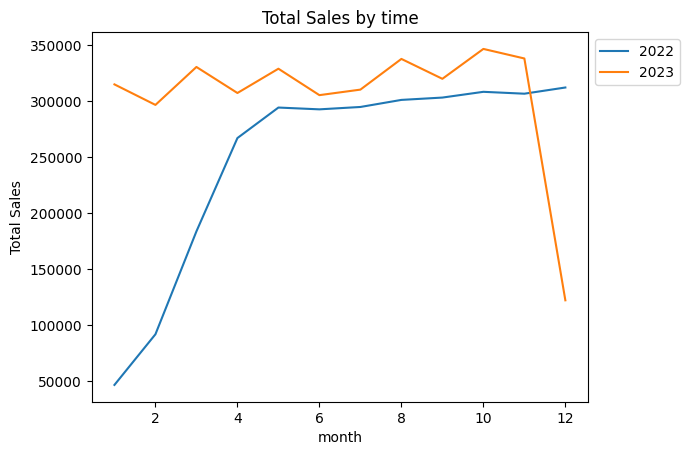

In [111]:
'''plot the sum of monthly sales in 2016 vs the monthly sales 2017'''
(
    transactions_df.assign(year=transactions_df['date'].dt.year, month=transactions_df['date'].dt.month)
                .set_index('date')
                .pivot_table(index='month', columns='year', values='SALES_VALUE', aggfunc='sum')
                .plot(ylabel='Total Sales', title='Total Sales by time')
                .legend(bbox_to_anchor=(1,1))
)

<Axes: xlabel='date'>

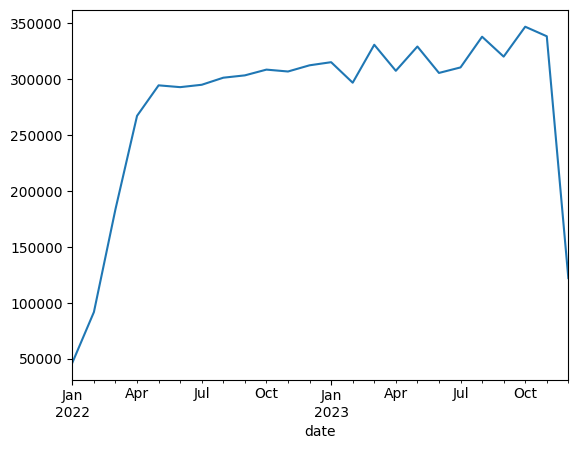

In [134]:
'''Plot the sum of sales by month. Are sales growing over time?'''
transactions_df.set_index('date')['SALES_VALUE'].resample('ME').sum().plot()
# transactions_df.groupby([transactions_df['date'].dt.month]).agg({'SALES_VALUE':'sum'}).plot(legend=False)

<Axes: xlabel='date,date'>

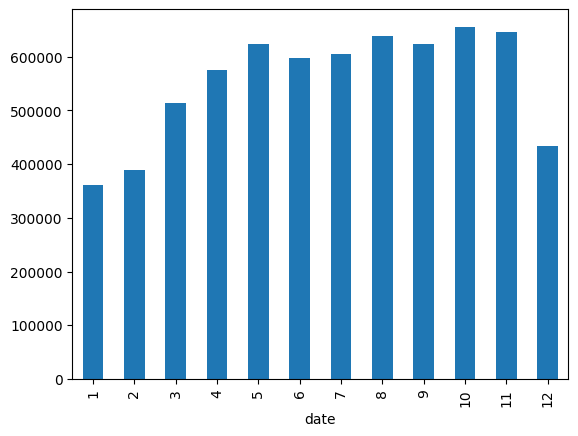

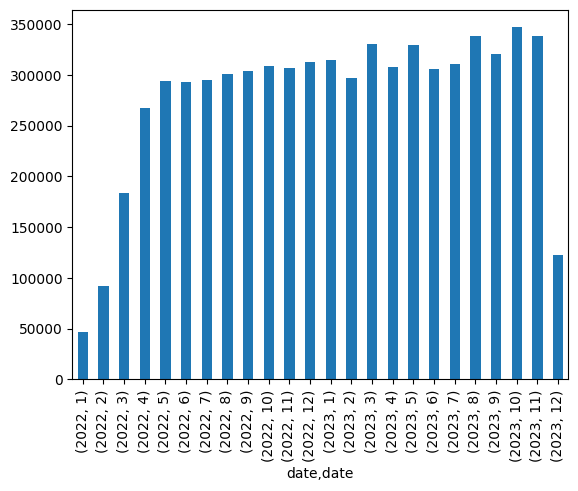

In [135]:
#or
# transactions_df.set_index('date')['SALES_VALUE'].resample('ME').sum().plot(kind='bar')
transactions_df.groupby([transactions_df['date'].dt.month]).agg({'SALES_VALUE':'sum'}).plot(kind='bar', legend=False)
transactions_df.groupby([transactions_df['date'].dt.year, transactions_df['date'].dt.month]).agg({'SALES_VALUE':'sum'}).plot(kind='bar', legend=False)

<Axes: xlabel='Date', ylabel='Total Sales'>

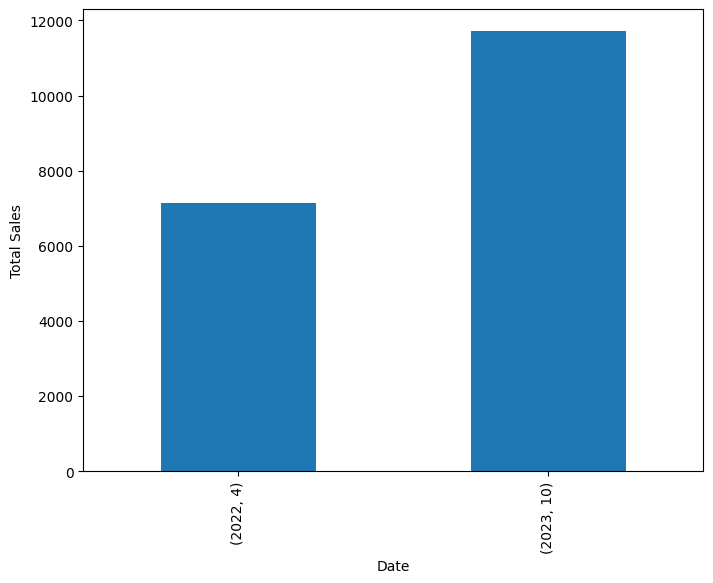

In [74]:
''' plot the same series after filtering down to dates April 2022 and October 2023.'''
# transactions_df.set_index('date').loc[['2022-04', '2023-10']][["SALES_VALUE"]].resample('ME').sum().plot(kind='bar')

#or
new_df = transactions_df.set_index("date").loc[["2022-04","2023-10"]].reset_index()
new_df.groupby([new_df['date'].dt.year, new_df['date'].dt.month]).agg({'SALES_VALUE':'sum'}).plot(kind='bar', figsize=(8,6), legend=False, ylabel='Total Sales', xlabel="Date")

<Axes: xlabel='Days of Week', ylabel='Total Sales'>

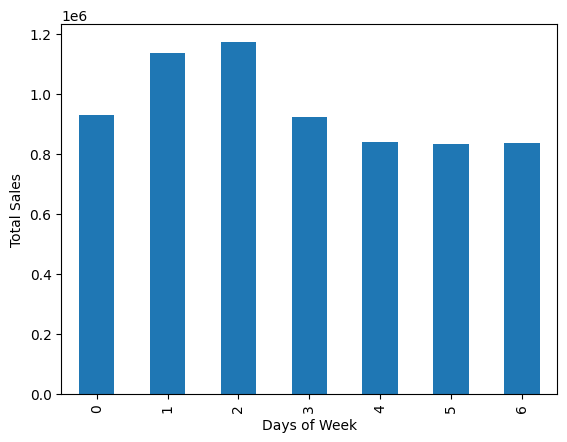

In [78]:
'''plot total sales by day of week.'''
transactions_df.groupby([transactions_df['date'].dt.day_of_week]).agg({'SALES_VALUE':'sum'}).plot(kind='bar', xlabel='Days of Week', ylabel='Total Sales', legend=False)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

# Demographics Anaysis

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. check the appropriate columns datatypes.
* Group the transactions table by household_id, and calculate the sum of SALES VALUE by household. Then, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match (inner join).
* Plot the sum of sales by age_desc and income_desc (in separate charts).
* create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?

In [82]:
demographic = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\hh_demographic.csv', 
                        delimiter=',', 
                        usecols= ['household_key', 'AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC']).reindex(['household_key', 'AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC'], axis=1)

demographic.head()

,household_key,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,65+,35-49K,2 Adults No Kids
1,7,45-54,50-74K,2 Adults No Kids
2,8,25-34,25-34K,2 Adults Kids
3,13,25-34,75-99K,2 Adults Kids
4,16,45-54,50-74K,Single Female


### Explore dataset datatypes

In [84]:
demographic.describe().round()

,household_key
count,801.0
mean,1235.0
std,737.0
min,1.0
25%,596.0
50%,1218.0
75%,1914.0
max,2499.0


In [86]:
demographic.dtypes

household_key     int64
AGE_DESC         object
INCOME_DESC      object
HH_COMP_DESC     object
dtype: object

In [88]:
demographic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   household_key  801 non-null    int64 
 1   AGE_DESC       801 non-null    object
 2   INCOME_DESC    801 non-null    object
 3   HH_COMP_DESC   801 non-null    object
dtypes: int64(1), object(3)
memory usage: 140.5 KB


In [89]:
demographic = demographic.astype(
    {
        'household_key': 'int16', 
        'AGE_DESC': 'category', 
        'INCOME_DESC': 'category', 
        'HH_COMP_DESC': 'category'
    }
)

demographic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  801 non-null    int16   
 1   AGE_DESC       801 non-null    category
 2   INCOME_DESC    801 non-null    category
 3   HH_COMP_DESC   801 non-null    category
dtypes: category(3), int16(1)
memory usage: 6.0 KB


### Explore categorical columns uniquely values 

In [91]:
demographic['AGE_DESC'].unique()

['65+', '45-54', '25-34', '35-44', '19-24', '55-64']
Categories (6, object): ['19-24', '25-34', '35-44', '45-54', '55-64', '65+']

In [93]:
demographic['HH_COMP_DESC'].unique()

['2 Adults No Kids', '2 Adults Kids', 'Single Female', 'Unknown', 'Single Male', '1 Adult Kids']
Categories (6, object): ['1 Adult Kids', '2 Adults Kids', '2 Adults No Kids', 'Single Female', 'Single Male', 'Unknown']

In [95]:
demographic['INCOME_DESC'].unique()

['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', ..., '125-149K', '150-174K', '250K+', '175-199K', '200-249K']
Length: 12
Categories (12, object): ['100-124K', '125-149K', '15-24K', '150-174K', ..., '35-49K', '50-74K', '75-99K', 'Under 15K']

In [97]:
''' 
Join aggregated version of transactional model (total sales per each household)  and demographical model  
'''


household_totalsales = transactions_df.groupby('household_key').agg({'SALES_VALUE': 'sum'})
household_totalsales

transactions_demograph = household_totalsales.merge(demographic, 
                           how='inner', 
                           left_on= 'household_key', 
                           right_on= 'household_key')
transactions_demograph

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.153320,65+,35-49K,2 Adults No Kids
1,7,3399.966064,45-54,50-74K,2 Adults No Kids
2,8,5534.860840,25-34,25-34K,2 Adults Kids
3,13,13190.605469,25-34,75-99K,2 Adults Kids
4,16,1512.006836,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.710938,45-54,100-124K,Unknown
664,2088,4905.628906,25-34,35-49K,Single Female
665,2092,2290.518066,35-44,Under 15K,1 Adult Kids
666,2094,3055.491943,45-54,50-74K,2 Adults No Kids


<Axes: xlabel='INCOME_DESC', ylabel='Total Sales'>

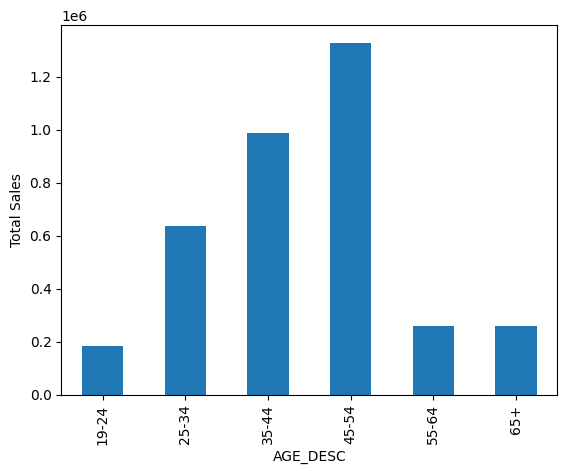

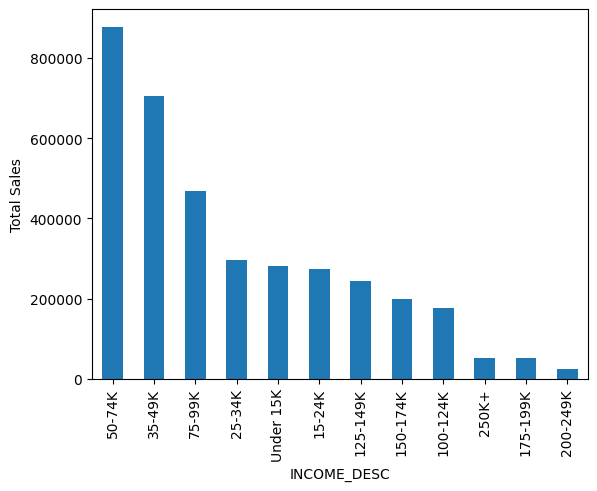

In [98]:
''' Plot the sum of sales by age_desc and income_desc (in separate charts).'''
transactions_demograph.groupby('AGE_DESC', observed=True).agg({'SALES_VALUE':'sum'}).plot(kind='bar', ylabel="Total Sales", legend=False)
transactions_demograph.groupby('INCOME_DESC', observed=True).agg({'SALES_VALUE':'sum'}).sort_values('SALES_VALUE', ascending=False).plot(kind='bar', ylabel="Total Sales", legend=False)

#### Conclude

* calculating the sum of sales by age_groups
consumer spending and consumer purchasing power tend to peak in middle age. Once folks don't have any more kids in the household.
They don't have nearly as many groceries to buy, which is why we see this gradual increase as people are earning more money, having more kids, and then when the kids leave,
they don't have nearly as much to spend on groceries.




* calculating the sum of sales by income_groups
group 50-74K group had the most sales, followed by 35-49K, followed by 75-99K and so on.
And so we might want to normalize this for the population, but in general, I would expect that our top household demographics in the United States are these first four bars. So this is almost as much of a reflection of the US population as it is this store specific customers.
But it is good to see we have a healthy contribution from some of these lower income brackets which could be "discount retailer".
So the fact that our under 15K is generating as much sales as 25-35K and 15-24k means that we havea very healthy cluster of discount shoppers and we'll be able to fold them into MAVEN Mega Mart strategy for targeting the same group of shoppers.


In [99]:
'''create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?'''
transactions_demograph.pivot_table(index='AGE_DESC', columns='HH_COMP_DESC', values='SALES_VALUE', aggfunc='mean',margins=True, observed=True).style.background_gradient(cmap='RdYlGn', axis=None)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.664551,5428.937500,4020.760498,4576.060547,3216.793457,4911.164062,4692.034668
25-34,5512.108398,5753.866211,5638.441406,4807.378906,4909.432129,7356.101562,5435.428223
35-44,6297.632324,6691.646973,6260.345215,6015.094727,4844.101074,4227.675781,6090.464355
45-54,6632.437500,6610.399902,5839.452637,4549.301270,4636.541992,4843.918457,5534.799316
55-64,3064.785645,4695.590332,5752.292969,4816.064941,3922.489990,7973.664062,5168.833008
65+,4040.709473,5536.738281,4614.051758,4059.639160,3871.498047,2879.256348,4340.874512
All,6032.694336,6279.969238,5599.785156,4895.856934,4544.563477,4936.057617,5468.316406


#### conclude
* we have high spend among our shoppers with kids.
* single males tend to spend the least.

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

# PRODUCT DEMOGRAPHICS

* Read in the product csv file, columns: `product_id` and `department` 
* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.
* pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?

In [101]:
products = pd.read_csv(r'E:\MegaMarket_Project\megaMarket\changes\Maven CSV - NPz files\product.csv', 
            delimiter=',', 
            usecols=['PRODUCT_ID', 'DEPARTMENT'])

products.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


### Explore products dataset

In [ ]:
products.describe().round(2)

,PRODUCT_ID
count,92353.00
mean,5328352.84
std,5359937.08
min,25671.00
25%,970628.00
50%,1621091.00
75%,9704770.00
max,18316298.00


In [ ]:
print(products['DEPARTMENT'].nunique())
products['DEPARTMENT'].unique()

44


array(['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD',
       'SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI', 'COSMETICS',
       'MEAT', 'FLORAL', 'TRAVEL & LEISUR', 'SEAFOOD', 'MISC SALES TRAN',
       'SALAD BAR', 'KIOSK-GAS', 'ELECT &PLUMBING', 'GRO BAKERY',
       'GM MERCH EXP', 'FROZEN GROCERY', 'COUP/STR & MFG', 'SPIRITS',
       'GARDEN CENTER', 'TOYS', 'CHARITABLE CONT', 'RESTAURANT', 'RX',
       'PROD-WHS SALES', 'MEAT-WHSE', 'DAIRY DELI', 'CHEF SHOPPE', 'HBC',
       'DELI/SNACK BAR', 'PORK', 'AUTOMOTIVE', 'VIDEO RENTAL', ' ',
       'CNTRL/STORE SUP', 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO',
       'PHARMACY SUPPLY'], dtype=object)

In [ ]:
products.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRODUCT_ID  92353 non-null  int64 
 1   DEPARTMENT  92353 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.6 MB


products.astype({
    'DEPARTMENT': 'category'
}).info(memory_usage='deep')

####### memory usage increased (useless to convert data types )

### Join transactions to products dataset (on product_id), to demographics dataset (on household_key)

In [103]:
merged_dataset = transactions_df.merge(products, how='inner', left_on='PRODUCT_ID', right_on='PRODUCT_ID').merge(demographic, how='inner', left_on='household_key', right_on='household_key')
merged_dataset

,date,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DEPARTMENT,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,2022-01-01,1364,26984896261,842930,1,2.189453,GROCERY,65+,100-124K,Single Female
1,2022-01-01,1364,26984896261,897044,1,2.990234,GROCERY,65+,100-124K,Single Female
2,2022-01-01,1364,26984896261,920955,1,3.089844,MEAT,65+,100-124K,Single Female
3,2022-01-01,1364,26984896261,937406,1,2.500000,MEAT-PCKGD,65+,100-124K,Single Female
4,2022-01-01,1364,26984896261,981760,1,0.600098,GROCERY,65+,100-124K,Single Female
...,...,...,...,...,...,...,...,...,...,...
1161570,2023-12-12,1369,42302712189,844054,1,1.290039,GROCERY,25-34,Under 15K,Single Male
1161571,2023-12-12,1369,42302712189,844759,1,1.690430,GROCERY,25-34,Under 15K,Single Male
1161572,2023-12-12,1369,42302712189,959737,2,25.984375,GROCERY,25-34,Under 15K,Single Male
1161573,2023-12-12,1369,42302712189,1135096,1,1.990234,GROCERY,25-34,Under 15K,Single Male


In [105]:
merged_dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1161575 non-null  datetime64[ns]
 1   household_key  1161575 non-null  int64         
 2   BASKET_ID      1161575 non-null  int64         
 3   PRODUCT_ID     1161575 non-null  int32         
 4   QUANTITY       1161575 non-null  int32         
 5   SALES_VALUE    1161575 non-null  float16       
 6   DEPARTMENT     1161575 non-null  object        
 7   AGE_DESC       1161575 non-null  category      
 8   INCOME_DESC    1161575 non-null  category      
 9   HH_COMP_DESC   1161575 non-null  category      
dtypes: category(3), datetime64[ns](1), float16(1), int32(2), int64(2), object(1)
memory usage: 103.1 MB


In [109]:
'''pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?'''
pivot_dataset = merged_dataset.pivot_table(index='DEPARTMENT', columns='AGE_DESC', values='SALES_VALUE', aggfunc='sum', observed=True).style.background_gradient(cmap='RdYlGn', axis=1)
pivot_dataset

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640625,21.247559,72.578125,55.913086,nan,16.373047
CHEF SHOPPE,81.304688,134.167969,348.545898,418.261719,80.863281,149.250977
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.953125,2.000000,0.099976
COSMETICS,698.616699,2273.053223,4361.940430,5187.461914,986.241211,600.887695
COUP/STR & MFG,7.490234,48.416992,121.203110,154.543945,40.678711,20.490234
DAIRY DELI,3.799805,3.850586,7.389648,16.750000,3.139648,1.940430
DELI,4043.258301,18181.574219,34576.343750,44333.480469,9850.298828,10462.179688
DELI/SNACK BAR,nan,nan,6.980469,1.559570,nan,3.310547


#### conclude
* 45-54 group dominates most product categories.
* But one area where our youngest demographic really is very high and is in second place is in spirits. But young folks really like to buy their spirits or alcohol at our stores. And maybe this isn't ethical, but if we want to * continue to market them, this might be one product segment where we can overindex on our young folks and find deals for them to keep them coming into buying other products as well.

# Export final dataset

In [110]:
pivot_dataset.to_excel("demographic_category_sales.xlsx", sheet_name="TotalSales_Pivot")